# Parkinson's Disease - Hybrid Functional Petri Net (HFPN)
This script has implemented the following blocks of the HFPN for PD:
- [ ] Cholesterol homeostasis
- [ ] Calcium homeotasis
- [ ] Energy metabolism
- [x] Lewy bodies formation

Implemented data and parameter optimisation
- [ ] Cholesterol homeostasis
- [ ] Calcium homeotasis
- [ ] Energy metabolism
- [ ] Lewy bodies formation
- [ ] ER retraction

### Add your imports

In [1]:
import os
import sys

# Only run this cell once to avoid confusion with directories
# Point this to the directory where HFPN.py is relative to your working directory
cwd = os.getcwd() # Get current working directory
root_folder = os.sep + "team-project"
# Move to 'utils' from current directory position
sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "utils" + os.sep)

# Import HFPN class to work with hybrid functional Petri nets
from hfpn import HFPN

sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "parkinsons" + os.sep)
# Import initial token, firing conditions and rate functions
from initial_tokens import *
from rate_functions import *
from firing_conditions import *
from visualisation import Analysis

### Initialise an empty HFPN

In [2]:
# Initialize an empty HFPN
pn = HFPN(time_step = 0.3) #unit = s/A.U.

## Define the places by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Lewy bodies pathology places

In [3]:
pn.add_place(it_p_SNCA_act, "p_SNCA_act","SNCA - active", continuous = True)
pn.add_place(it_p_VPS35, "p_VPS35", "VPS35", continuous = False)
pn.add_place(it_p_SNCA_inact, "p_SNCA_inact", "SNCA - inactive", continuous = True)
pn.add_place(it_p_SNCA_olig, "p_SNCA_olig", "SNCA - Oligomerised", continuous = True)
pn.add_place(it_p_LB, "p_LB", "Lewy body", continuous = True)
pn.add_place(it_p_Fe2, "p_Fe2", "Fe2 iron pool", continuous = True)
pn.add_place(it_p_ROS_mito, "p_ROS_mito", "ROS - mitochondria", continuous = True)
# Places that are linked to other modules
pn.add_place(it_p_Ca_cyto, "p_Ca_cyto", "Ca - cytosole", continuous = True)
pn.add_place(it_p_LRRK2_mut, "p_LRRK2_mut","LRRK2 - mutated", continuous = False)
pn.add_place(it_p_27OHchol_intra, "p_27OHchol_intra","27-OH chol - intracellular", continuous = True)
pn.add_place(it_p_ApoEchol_EE, "p_ApoEchol_EE","ApoE - Early endosome", continuous = True)

## Define the transitions by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Lewy bodies pathology transitions

In [4]:
pn.add_transition_with_speed_function(
                    transition_id = 't_SNCA_degr',
                    label = 'SNCA degradation by CMA',
                    input_place_ids = ['p_SNCA_act','p_VPS35','p_LRRK2_mut','p_27OHchol_intra'],
                    firing_condition = fc_t_SNCA_degr,
                    reaction_speed_function = r_t_SNCA_degr,
                    consumption_coefficients = [1,0,0,0], 
                    output_place_ids = ['p_SNCA_inact'],         
                    production_coefficients = [1])


pn.add_transition_with_speed_function(
                    transition_id = 't_SNCA_aggr',
                    label = 'SNCA aggregation',
                    input_place_ids = ['p_SNCA_act','p_Ca_cyto','p_ROS_mito'],
                    firing_condition = fc_t_SNCA_aggr,
                    reaction_speed_function = r_t_SNCA_aggr,
                    consumption_coefficients = [30,0,0], #should be reviewed if Ca is consumed
                    output_place_ids = ['p_SNCA_olig'],         
                    production_coefficients = [1])

pn.add_transition_with_speed_function(
                    transition_id = 't_SNCA_fibril',
                    label = 'SNCA fibrillation',
                    input_place_ids = ['p_SNCA_olig'],
                    firing_condition = fc_t_SNCA_fibril,
                    reaction_speed_function = r_t_SNCA_fibril,
                    consumption_coefficients = [100], 
                    output_place_ids = ['p_LB'],         
                    production_coefficients = [1])

pn.add_transition_with_speed_function(
                    transition_id = 't_IRE',
                    label = 'IRE',
                    input_place_ids = ['p_Fe2'],
                    firing_condition = fc_t_IRE,
                    reaction_speed_function = r_t_IRE,
                    consumption_coefficients = [0], 
                    output_place_ids = ['p_SNCA_act'],         
                    production_coefficients = [1])

## Run the network and plot a time evolution of the system

In [5]:
pn.reset_network()

In [6]:
pn.run_many_times(number_runs=1, number_time_steps=100000) 

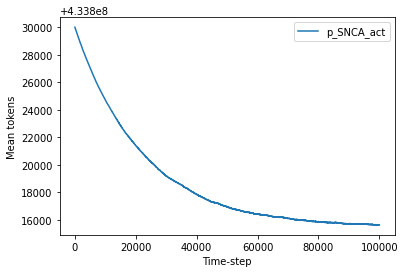

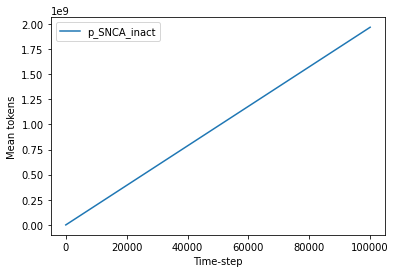

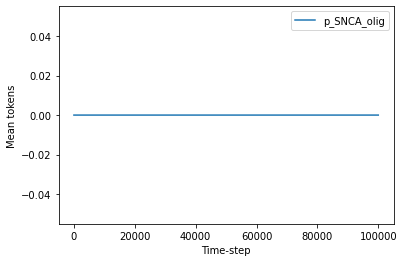

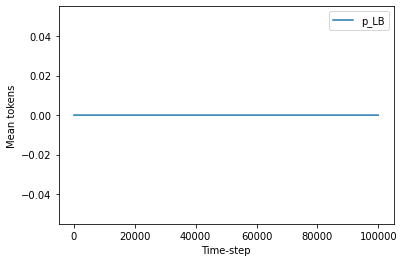

In [7]:
PDanalysis = Analysis(pn)
# output_places=['p_RTN3_PN','p_RTN3_axon']
# output_places=['p_chol_LE']


PDanalysis.mean_run_tokens_over_time(['p_SNCA_act'])
output_places=['p_SNCA_inact']
PDanalysis.mean_run_tokens_over_time(output_places)
output_places=['p_SNCA_olig']
PDanalysis.mean_run_tokens_over_time(output_places)
output_places=['p_LB']
PDanalysis.mean_run_tokens_over_time(output_places)

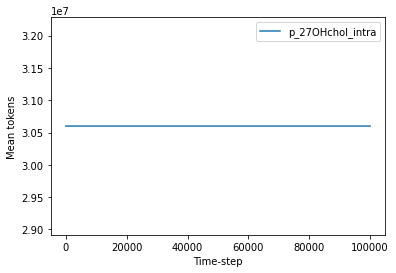

In [8]:
output_places=['p_27OHchol_intra']
PDanalysis.mean_run_tokens_over_time(output_places)